In [13]:
# 정치활동 후원금에 대한 데이터
# 기부자의 이름, 직업, 고용형태, 주소, 기부금액이 포함되어 있다.
# 그 중 2012년 미국 대통령 선거 데이터

In [14]:
import pandas as pd

fec = pd.read_csv('C:/Users/user/Desktop/pydata-book-2nd-edition/pydata-book-2nd-edition/datasets/fec/P00000001-ALL.csv')

In [15]:
fec.info()
print(fec.index)
print(fec.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [16]:
# DataFrame 에는 다음과 같은 형태로 저장되어 있다.

fec.iloc[123456]

# 하나의 행을 기준으로 정보를 전부 보여준다.

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [17]:
# 기부자와 선거 자금에서 찾을 수 있는 패턴에 대한 통계를 추출하기 위해
# 이 데이터를 적당한 크기로 쪼개서 나누는 다양한 방법을 떠올릴 수 있다.

# 정당 가입 여부에 대한 데이터가 없으므로, 추가해주는 것이 유용한다.
# unique 메서드를 이용해서 모든 정당의 후부 목록을 얻자

In [18]:
unique_cands = fec.cand_nm.unique()

# 유일값 찾기

In [19]:
unique_cands

# 겹치는 후보들의 이름을 unique 함수로 하나씩만 나오게 해서 전체 후보를 알 수 있게 해준다.

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [20]:
unique_cands[2]

'Obama, Barack'

In [21]:
# 소속 정당은 dict 를 사용해서 표시할 수 있다.

In [22]:
parties = {'Bachmann, Michelle': 'Republican',
          'Cain, Herman': 'Republican',
          'Gingrich, Newt': 'Republican',
          'Huntsman, Jon': 'Republican',
          'Johnson, Gary Earl': 'Republican',
          'McCotter, Thaddeus G': 'Republican',
          'Obama, Barack': 'Democrat',
          'Paul, Ron': 'Republican',
          'Pawlenty, Timothy': 'Republican',
          'Perry, Rick': 'Republican',
          "Roemer, Charles E. 'Buddy' III": 'Republican',
          "Romney, Mitt": 'Republican',
          'Santorum, Rick': 'Republican',}

In [23]:
# 이 사전 정보와 Series 객체의 amp 메서드를 사용해 후보 이름으로부터
# 정당 배열을 계산해낼 수 있다.

fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [24]:
fec.cand_nm[123456:123461].map(parties)
# print(fec.cand_nm)

# 해당 딕셔너리의 키값을 찾아 키값의 밸류값을 전부 바꿔준다.

# map함수는 DataFrame 타입이 아니라, 반드시 Series 타입에서만 사용해야 한다.
# 먼저, Series를 한마디로 정의하면 딱 이거다.
# 값(value) + 인덱스(index) = 시리즈 클래스(Series)

# Series는 NumPy에서 제공하는 1차원 배열과 비슷하지만 
# 각 데이터의 의미를 표시하는 인덱스(index)를 붙일 수 있다. 
# 하지만 데이터 자체는 그냥 값(value)의 1차원 배열이다.
# map함수는 Series의 이러한 값 하나하나에 접근하면서 해당 함수를 수행한다.

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [25]:
# party 컬럼으로 추가

fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

# party 컬럼을 만들고, map 함수를 적용해서 키값에 해당하는 밸류값을 바꿔주고
# 밸류값을 몇개 있는지 총 개수를 value_counts 함수를 이용해 구한다.

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [26]:
# 분석을 하기 전에 데이터를 다음어야 한다. 
# 이 데이터에는 기부금액과 환급금액(기부금액이 마이너스인 경우)이 함께 포함되어 있다.

In [27]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [28]:
# 분석을 단순화 하기 위해 기부금액이 양수인 데이터만 골라내겠다.

In [29]:
fec = fec[fec.contb_receipt_amt>0]

# 왜 리스트로 묶어서 했으며, 위에 있는걸로 왜 마이너스가 들어가 있는것까지 함께 포함되는가

In [30]:
# 버락 오바마와 미트 롬니가 양대 후보이므로 이 두 후보의 기부금액 정보만 따로 추려내겠다.

In [59]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
print(fec_mrbo[:10])

# isin 구문은 열이 list의 값들을 포함하고 있는 모든 행들을 
# 골라낼 때 주로 쓰인다. 

       cmte_id    cand_id       cand_nm              contbr_nm contbr_city  \
411  C00431171  P80003353  Romney, Mitt     ELDERBAUM, WILLIAM         DPO   
412  C00431171  P80003353  Romney, Mitt     ELDERBAUM, WILLIAM         DPO   
413  C00431171  P80003353  Romney, Mitt       CARLSEN, RICHARD         APO   
414  C00431171  P80003353  Romney, Mitt         DELUCA, PIERRE         APO   
415  C00431171  P80003353  Romney, Mitt       SARGENT, MICHAEL         APO   
416  C00431171  P80003353  Romney, Mitt  WILSON, ANDREW C. MR.         DPO   
417  C00431171  P80003353  Romney, Mitt          GRIFFIS, JOHN         APO   
418  C00431171  P80003353  Romney, Mitt       SARGENT, MICHAEL         APO   
419  C00431171  P80003353  Romney, Mitt          GRIFFIS, JOHN         APO   
420  C00431171  P80003353  Romney, Mitt     DELUCA, PIERRE MR.         APO   

    contbr_st   contbr_zip                   contbr_employer  \
411        AA   3.4023e+08                     US GOVERNMENT   
412        AA

In [32]:
# 직업 및 고용주에 따른 기부 통계
# 예를 들어 변호사는 민주당에 더 많은 돈을 기부하는 경향이 있으며,
# 기업 임원은 공화당에 더 많은 돈을 기부하는 경향이 있지만,
# 그대로 받아들이기보다는 데이터를 통해 직접 확인해보자
# 직업별 전체 기부 숫자는 쉽게 구할 수 있다.

In [63]:
fec.contbr_occupation.value_counts()[:10]


# 전체 직업별 기부 숫자

RETIRED         233990
NOT PROVIDED     35107
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
NOT PROVIDEO     22044
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
Name: contbr_occupation, dtype: int64

In [67]:
print(fec.contbr_occupation)

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
                       ...             
1001726                    NOT PROVIDEO
1001727                  BUSINESS OWNER
1001728                    NOT PROVIDEO
1001729    LONGWALL MAINTENANCE FOREMAN
1001730                    NOT PROVIDEO
Name: contbr_occupation, Length: 991475, dtype: object


In [34]:
# 내용을 보면 일반적인 직업 유형이거나 같은 유형이지만,
# 다른 이름으로 많은 결과가 포함되어 있음을 알 수 있다.
# 하나의 직업을 다른 직업으로 매핑함으로써 이런 문제를 제거하자
# dict.get 을 사용하는 꼼수를 써서 매핑 정보가 없는 직업은 그대로 사용한다.

In [70]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDEO',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDEO',
    'C.E.O': 'CEO'
}

f = lambda x: occ_mapping.get(x, x)

# lambda 를 이용해서 키값을 밸류값으로 전부 바꿔주는데
# x에 해당 키 값이 없으면 그대로 반환해준다.
# 즉 fec.contbr_occupation 안에 있는 모든 값들에 대해
# map 함수로 위의 f 식을 적용해서
# 하나씩 전부 꺼내와 키값과 해당 값을 비교해서
# 같은 키값이라면 밸류값으로 바꿔준다.


# mapping 이 없다면 x를 반환한다.


# 파이썬에서 "lambda" 는 런타임에 생성해서 사용할 수 있는 
# 익명 함수 입니다. 
# 이것은 함수형 프로그래밍 언어에서 lambda와 정확히 똑같은 것은 아니지만,
# 파이썬에 잘 통합되어 있으며 filter(), map(), reduce()와  같은 
# 전형적인 기능 개념과 함께 사용되는 매우 강력한 개념입니다.

# lambda는 쓰고 버리는 일시적인 함수 입니다. 
# 함수가 생성된 곳에서만 필요합니다. 
# 즉, 간단한 기능을 일반적인 함수와 같이 정의해두고 쓰는 것이 아니고 
# 필요한 곳에서 즉시 사용하고 버릴 수 있습니다

print(occ_mapping)


fec.contbr_occupation = fec.contbr_occupation.map(f)
print(fec.contbr_occupation)
# fec.contbr_occupation 에 있는 값에 map 함수를 적용해서
# f 의 lamdba function 을 iterable의 모든 요소에 대해 적용한다.
# 즉, occ.mapping.get(x, x) 계속 실행해서 lambda 에 의해 변경된 
# 값을 반환하여 fec.contbr_occupation 변수에 할당한다.


# 람다 함수의 장점은 map() 함수와 함께 사용될 때 볼 수 있습니다.  
# map() 은 두 개의 인수를 가지는 함수입니다.

# r = map(function, iterable, ...)
# 첫 번째 인자 function 는 함수의 이름 입니다. 
# 두 번째 인자 iterable은 한번에 하나의 멤버를 반환할 수 있는 객체 입니다
# .(list, str, tuple) map() 함수는 function을 iterable의 모든 요소에 대해
# 적용합니다. 그리고 function에 의해 변경된  iterator를 반환합니다


{'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDEO', 'INFORMATION REQUESTED': 'NOT PROVIDED', 'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDEO', 'C.E.O': 'CEO'}
0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
                       ...             
1001726                    NOT PROVIDEO
1001727                  BUSINESS OWNER
1001728                    NOT PROVIDEO
1001729    LONGWALL MAINTENANCE FOREMAN
1001730                    NOT PROVIDEO
Name: contbr_occupation, Length: 991475, dtype: object


In [36]:
# 고용주에 대해서도 마찬가지로 처리하자

In [71]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDEO',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED'
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

print(fec.contbr_employer)

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                                  NONE
4                                  NONE
                       ...             
1001726                    NOT PROVIDEO
1001727    DUFFY EQUIPMENT COMPANY INC.
1001728                    NOT PROVIDEO
1001729                        T.A.C.C.
1001730                    NOT PROVIDEO
Name: contbr_employer, Length: 991475, dtype: object


In [38]:
# 이제 pivot_table 을 사용해서 정당과 직업별로 데이터를 집계한 다음
# 최소 2백만불 이상 기부한 직업만 골라내자

In [39]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

# 행 합계는 sum(1), sum(axis=1)
# 열 합계는 sum(0), sum(axis=0)
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2074284.79,1.640758e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05


In [40]:
# 이런 종류의 데이터는 막대그래프로 ('barh' 는 수평막대그래프를 의미한다)
# 시각화 하는 편이 보기 좋다.

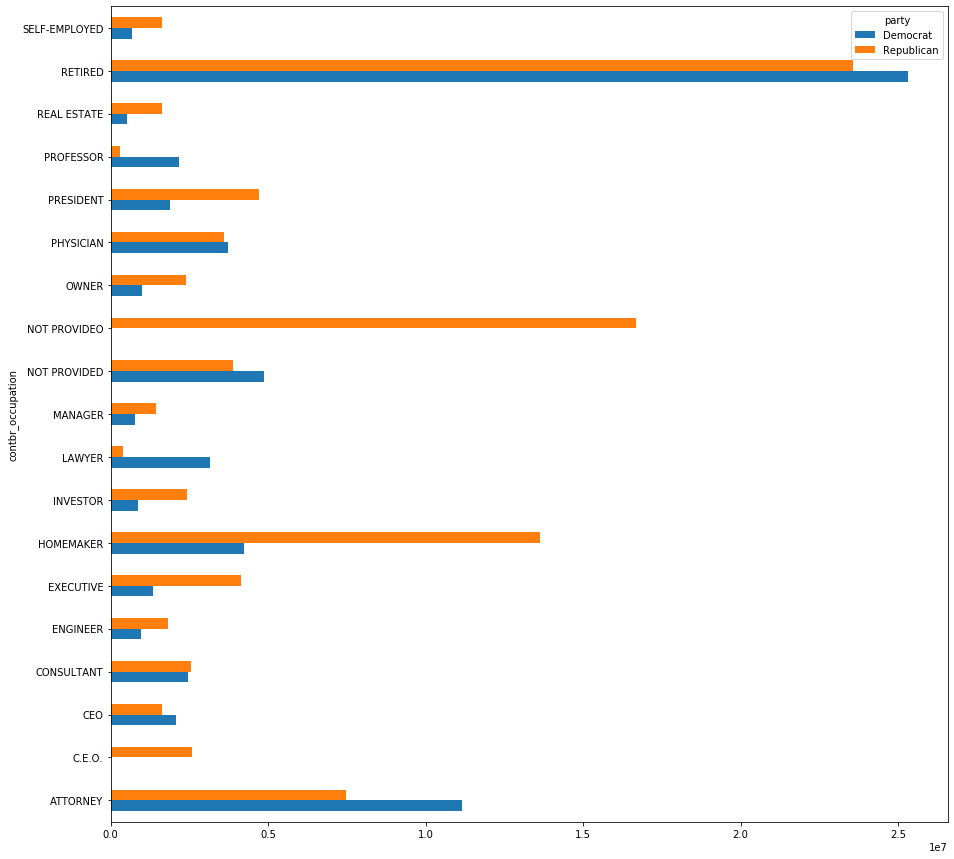

In [73]:
over_2mm.plot(kind='barh', figsize=(15, 15))

In [42]:
# 오바마 후보와 롬니 후보별로 가장 많은 금액을 기부한 직군을 알아보자
# 이 통계를 구하려면 후보 이름으로 그룹을 묶고 이 장의 앞에서 사용했던
# 변형된 top 메서드를 이용하면 된다.

In [43]:
def get_top_amounts(group, key, n=5):
    # 매개인자로 group 과 key 를 받고 n 의 default 값으로 5를 준다.
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # key 를 기준으로 contb_receipt_amt 를 groupby 해서 더한 값을
    # totals 에 할당한다.
    return totals.nlargest(n)

    # 리턴값으로 totals 의 그룹내에서 상위 n개 즉 5개를 가져온다.

In [77]:
grouped = fec_mrbo.groupby('cand_nm')
# fec_mrbo 데이터 중 cand_nm 으로 묶어서 grouped 에 할당한다.
# fec_mrbo 는 대표 두 후보의 기부금만 따로 빼낸 데이터
print(fec_mrbo)
print(grouped)

          cmte_id    cand_id        cand_nm           contbr_nm contbr_city  \
411     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
412     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
413     C00431171  P80003353   Romney, Mitt    CARLSEN, RICHARD         APO   
414     C00431171  P80003353   Romney, Mitt      DELUCA, PIERRE         APO   
415     C00431171  P80003353   Romney, Mitt    SARGENT, MICHAEL         APO   
...           ...        ...            ...                 ...         ...   
701381  C00431445  P80003338  Obama, Barack      MOUNTS, ROBERT         APO   
701382  C00431445  P80003338  Obama, Barack     TAITANO, TYRONE     HAGATNA   
701383  C00431445  P80003338  Obama, Barack      TUCKER, PAMELA         APO   
701384  C00431445  P80003338  Obama, Barack      MOUNTS, ROBERT         APO   
701385  C00431445  P80003338  Obama, Barack         NEAL, AMBER         APO   

       contbr_st   contbr_zip                      

In [76]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

# grouped 의 데이터값을 get_top_amounts 함수에 넣는다.
# contbr_occupation 을 키 값으로 넣고, 
# 각 7번째 최고 기부금 합계 데이터값들을 가져온다.

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDEO         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               EXECUTIVE             2300947.03
               C.E.O.                1968386.11
Name: contb_receipt_amt, dtype: float64

In [45]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [78]:
# 기부금액
# 이 데이터를 효과적으로 분석하는 방법은 cut 함수를 이용해서
# 깁 규모별로 버킷을 만들어 기부자 수를 분할하는 것이다.

In [80]:
print(fec_mrbo.contb_receipt_amt)

411        25.0
412       110.0
413       250.0
414        30.0
415       100.0
          ...  
701381     25.0
701382    250.0
701383      3.0
701384     25.0
701385    135.0
Name: contb_receipt_amt, Length: 694282, dtype: float64


In [47]:
import numpy as np

bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

# fec_mrbo.contb_receipt_amt 의 값을 bins 변수를 적용하는데
# cut 함수를 이용해서 동일 길이로 나누어 범주를 만든 값을 labels변수에
# 할당한다.

# 동일 길이로 나누어서 범주 만들기

labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [86]:
# 이제 이 데이터를 이름과 버킷 이름으로 그룹지어 기부금액 규모에 따른
# 히스토리그램을 그릴 수 있다.

In [88]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
# cand_nm 을 기준으로 labels 값을 각 cand_nm 에 할당한다.
grouped.size()

# 보통의 size 는 행의 개수를 세는 메서드지만
# 여기서는 groupby 가 되어 있기에 그룹 별 행의 개수를 세는거라고 이해하자.

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
               (100000, 1000000]           0
               (1000000, 10000000]         0
dtype: int64

In [85]:
grouped = fec_mrbo.groupby([labels, 'cand_nm'])
# labels 를 기준으로 cand_nm 값을 넣는다.
grouped.size()

contb_receipt_amt    cand_nm      
(0, 1]               Obama, Barack       493
                     Romney, Mitt         77
(1, 10]              Obama, Barack     40070
                     Romney, Mitt       3681
(10, 100]            Obama, Barack    372280
                     Romney, Mitt      31853
(100, 1000]          Obama, Barack    153991
                     Romney, Mitt      43357
(1000, 10000]        Obama, Barack     22284
                     Romney, Mitt      26186
(10000, 100000]      Obama, Barack         2
                     Romney, Mitt          1
(100000, 1000000]    Obama, Barack         3
                     Romney, Mitt          0
(1000000, 10000000]  Obama, Barack         4
                     Romney, Mitt          0
dtype: int64

In [89]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)
# 열과 행을 바꿔준다.

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [50]:
#  이 데이터를 보면 오바마는 롬니보다 적은 금액의 기부를 훨씬 많이 받았다.
# 기부금액을 모두 더한 후 버킷별로 정규화해서 후보별 전체 기부금액 대비 비율을
# 시각화할 수 있다.

In [99]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
print(bucket_sums)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
# 각 행을 1로 잡고, 해당 행의 비율을 구한다.
# sum(axis=1) 행 합을 구한다.

normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
(100, 1000]            54798531.46   22363381.69
(1000, 10000]          51753705.67   63942145.42
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08           NaN
(1000000, 10000000]     7148839.76           NaN


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


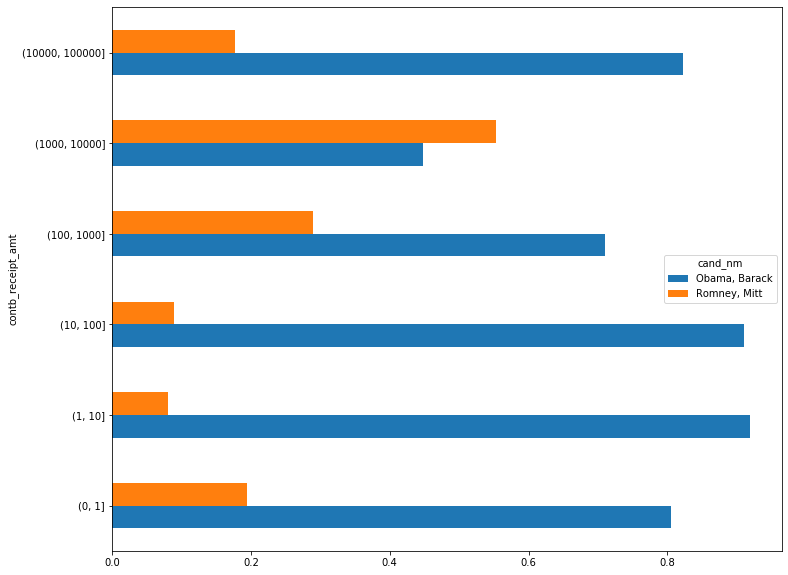

In [52]:
# 후보별 전체 기부금액 대비 비율

normed_sums[:-2].plot(kind='barh', figsize=(12,10))

In [53]:
# 기부금액 순에서 가장 큰 2개의 버킷은 개인 후원이 아니므로 그래프에서 제외시켰다.

# 물론 지금 살펴본 부넉은 좀 더 개량할 수 있다. 예를 들어 기부자의 이름과 우편번호를
# 이용해서 적은 금액을 자주 기부한 사람과 큰 금액을 기부한 사람별로 데이터를 
# 집계할 수도 있을 것이다. 나는 독자들이 이 데이트를 내려받아 직접 살펴보길 강력권장한다.

In [54]:
# 주별 기부 통계

# 데이터를 후보자와 주별로 집계하는 것은 흔할 일이다.

In [55]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [56]:
# 각 로우의 전체 기부금액으로 나누면 각 후보에 대한 주별 전체 기부금액의 
# 상대적인 비율을 얻을 수 있다.

In [57]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
